<a href="https://colab.research.google.com/github/xuan727/6301_group9/blob/dev/6301_group_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
from sklearn import tree                                  # sklearn tree model for decision trees
from sklearn.model_selection import train_test_split      # for partitioning data
from sklearn.model_selection import cross_val_score       # for cross validation
from sklearn.metrics import roc_auc_score, accuracy_score # to assess decision tree perforamce

# to upload local files
import io
from google.colab import files             

import numpy as np                                   # array, vector, matrix calculations
import pandas as pd                                  # dataFrame handling

from matplotlib import pyplot as plt                 # plotting
import seaborn as sns                                # slightly better plotting  

SEED = 12345                                         # ALWAYS use a random seed for better reproducibility

In [64]:
# special google collab command to upload a file from computer
uploaded = files.upload()

Saving credit_line_increase.csv to credit_line_increase (4).csv


In [65]:
type(uploaded) # what kind of Python object did we just create?

dict

In [66]:
uploaded.keys() # what is stored in that Python object?

dict_keys(['credit_line_increase.csv'])

In [67]:
# read uploaded data into a pandas dataframe
data = pd.read_csv(io.StringIO(uploaded['credit_line_increase.csv'].decode('utf-8')))
# print(data). # test file's data on aug 25

In [68]:
data.shape # (rows,columns)

(30000, 26)

In [69]:
data.columns # names of columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'RACE', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DELINQ_NEXT'],
      dtype='object')

In [70]:
data.isnull().any() # check for missing values

ID             False
LIMIT_BAL      False
SEX            False
RACE           False
EDUCATION      False
MARRIAGE       False
AGE            False
PAY_0          False
PAY_2          False
PAY_3          False
PAY_4          False
PAY_5          False
PAY_6          False
BILL_AMT1      False
BILL_AMT2      False
BILL_AMT3      False
BILL_AMT4      False
BILL_AMT5      False
BILL_AMT6      False
PAY_AMT1       False
PAY_AMT2       False
PAY_AMT3       False
PAY_AMT4       False
PAY_AMT5       False
PAY_AMT6       False
DELINQ_NEXT    False
dtype: bool

In [71]:
data.describe() # basic descriptive statistics

ID       LIMIT_BAL  ...       PAY_AMT6   DELINQ_NEXT
count  30000.000000    30000.000000  ...   30000.000000  30000.000000
mean   15000.500000   167484.322667  ...    5215.502567      0.221200
std     8660.398374   129747.661567  ...   17777.465775      0.415062
min        1.000000    10000.000000  ...       0.000000      0.000000
25%     7500.750000    50000.000000  ...     117.750000      0.000000
50%    15000.500000   140000.000000  ...    1500.000000      0.000000
75%    22500.250000   240000.000000  ...    4000.000000      0.000000
max    30000.000000  1000000.000000  ...  528666.000000      1.000000

[8 rows x 26 columns]

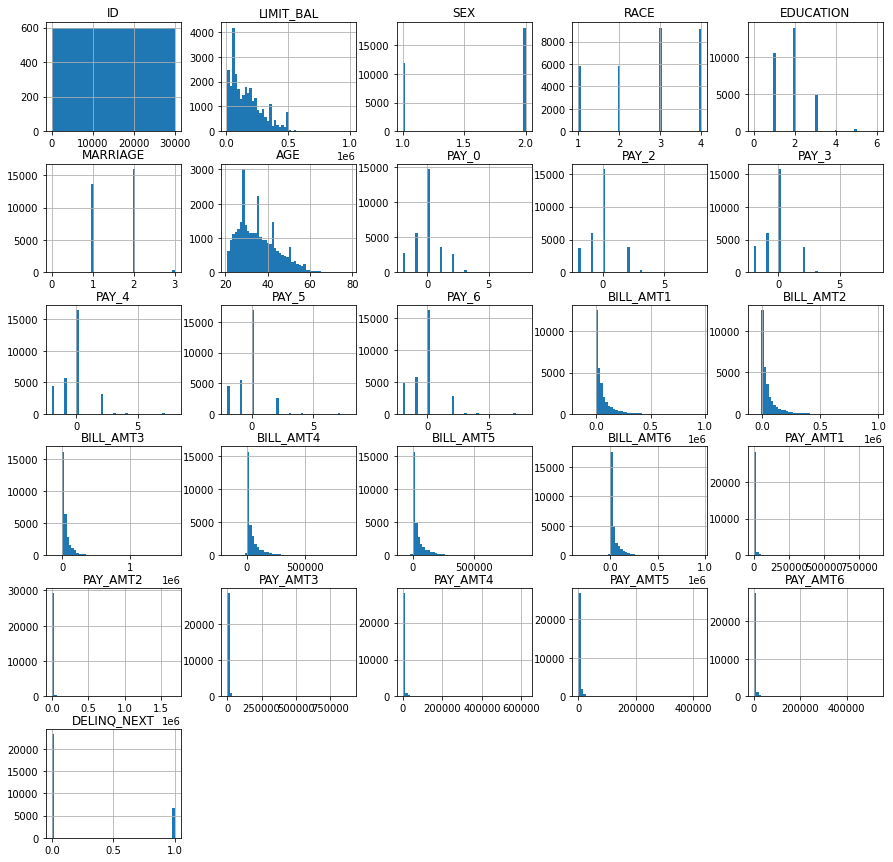

In [72]:
_ = data[data.columns].hist(bins=50, figsize=(15, 15)) # display histograms

In [73]:
# Pearson correlation matrix
corr = data.corr() 
corr

ID  LIMIT_BAL       SEX  ...  PAY_AMT5  PAY_AMT6  DELINQ_NEXT
ID           1.000000   0.026179  0.018497  ...  0.000652  0.003000    -0.013952
LIMIT_BAL    0.026179   1.000000  0.024755  ...  0.217202  0.219595    -0.153520
SEX          0.018497   0.024755  1.000000  ... -0.001667 -0.002766    -0.039961
RACE        -0.000710   0.044173  0.006149  ...  0.022148  0.020259    -0.303811
EDUCATION    0.039177  -0.219161  0.014232  ... -0.040358 -0.037200     0.028006
MARRIAGE    -0.029079  -0.108139 -0.031389  ... -0.001205 -0.006641    -0.024339
AGE          0.018678   0.144713 -0.090874  ...  0.022850  0.019478     0.013890
PAY_0       -0.030575  -0.271214 -0.057643  ... -0.058190 -0.058673     0.324794
PAY_2       -0.011215  -0.296382 -0.070771  ... -0.037093 -0.036500     0.263551
PAY_3       -0.018494  -0.286123 -0.066096  ... -0.035863 -0.035861     0.235253
PAY_4       -0.002735  -0.267460 -0.060173  ... -0.033590 -0.026565     0.216614
PAY_5       -0.022199  -0.249411 -0.055064  ... -0.033337 -0.023027     0.204149
PAY_6       -0.020270  -0.235195 -0.044008  ... -0.046434 -0.025299     0.186866
BILL_AMT1    0.019389   0.285430 -0.033642  ...  0.167026  0.179341    -0.019644
BILL_AMT2    0.017982   0.278314 -0.031183  ...  0.157957  0.174256    -0.014193
BILL_AMT3    0.024354   0.283236 -0.024563  ...  0.179712  0.182326    -0.014076
BILL_AMT4    0.040351   0.293988 -0.021880  ...  0.160433  0.177637    -0.010156
BILL_AMT5    0.016705   0.295562 -0.017005  ...  0.141574  0.164184    -0.006760
BILL_AMT6    0.016730   0.290389 -0.016733  ...  0.307729  0.115494    -0.005372
PAY_AMT1     0.009742   0.195236 -0.000242  ...  0.148459  0.185735    -0.072929
PAY_AMT2     0.008406   0.178408 -0.001391  ...  0.180908  0.157634    -0.058579
PAY_AMT3     0.039151   0.210167 -0.008597  ...  0.159214  0.162740    -0.056250
PAY_AMT4     0.007793   0.203242 -0.002229  ...  0.151830  0.157834    -0.056827
PAY_AMT5     0.000652   0.217202 -0.001667  ...  1.000000  0.154896    -0.055124
PAY_AMT6     0.003000   0.219595 -0.002766  ...  0.154896  1.000000    -0.053183
DELINQ_NEXT -0.013952  -0.153520 -0.039961  ... -0.055124 -0.053183     1.000000

[26 rows x 26 columns]

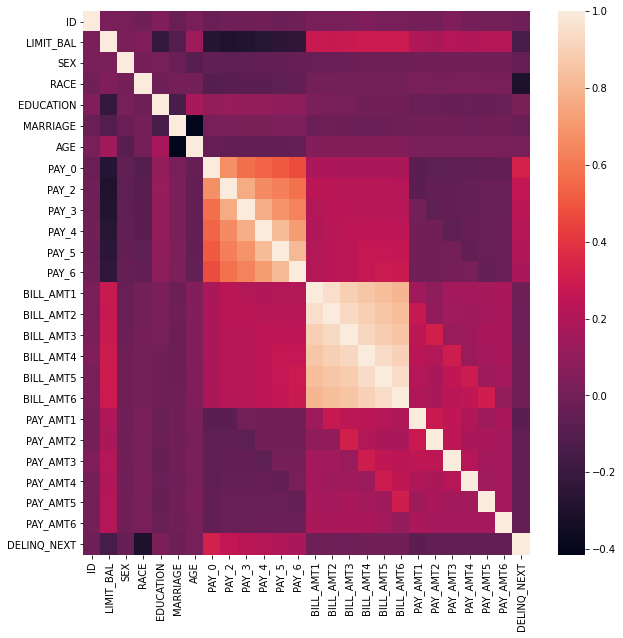

In [74]:
# correlation heatmap
plt.figure(figsize=(10, 10))
_ = sns.heatmap(corr, 
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values)

In [75]:
# assign basic modeling roles
# do not put demographic variables into a financial model!
y_name = 'DELINQ_NEXT'
X_names = ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [76]:
# partition data for honest assessment
train_X, valid_test_X, train_y, valid_test_y = train_test_split(data[X_names], data[y_name], test_size=0.5, random_state=SEED) # split off training data
valid_X, test_X, valid_y, test_y = train_test_split(valid_test_X, valid_test_y, test_size=0.5, random_state=SEED) # split remainder into validation and test

# summarize 
print('Training data: %i rows and %i columns' % (train_X.shape[0], train_X.shape[1] + 1))
print('Validation data: %i rows and %i columns' % (valid_X.shape[0], valid_X.shape[1] + 1))
print('Testing data: %i rows and %i columns' % (test_X.shape[0], test_X.shape[1] + 1))

# housekeeping
del valid_test_X 
del valid_test_y

Training data: 15000 rows and 20 columns
Validation data: 7500 rows and 20 columns
Testing data: 7500 rows and 20 columns


In [77]:
# train decision tree 
# with validation-based early stopping
max_depth = 12
candidate_models = {}

# cycle through tree depths to find best model
# in validation data !!!
for depth in range(0, max_depth):

    # fit a model at max_depth=depth+1
    clf=tree.DecisionTreeClassifier(max_depth = depth + 1)
    clf.fit(train_X, train_y)

    # score train and validation data
    train_phat = clf.predict_proba(train_X)[:,1]
    valid_phat = clf.predict_proba(valid_X)[:,1]

    #calculate AUC to assess performance quality
    train_auc = roc_auc_score(train_y, train_phat)
    valid_auc = roc_auc_score(valid_y, valid_phat)

    # calculate cross validation scores to assess stability
    # in validation data!
    cv_scores = cross_val_score(clf, valid_X, valid_y, scoring='roc_auc', cv=5)
    cv_std = np.std(cv_scores)

    #store results
    #to analyze and select best model later
    candidate_models[depth + 1]={} #dictionary inside a dictionary 
    candidate_models[depth + 1]['Model']=clf
    candidate_models[depth + 1]['Training AUC']=train_auc
    candidate_models[depth + 1]['Validation AUC']=valid_auc
    candidate_models[depth + 1]['5-Fold 50']=cv_std


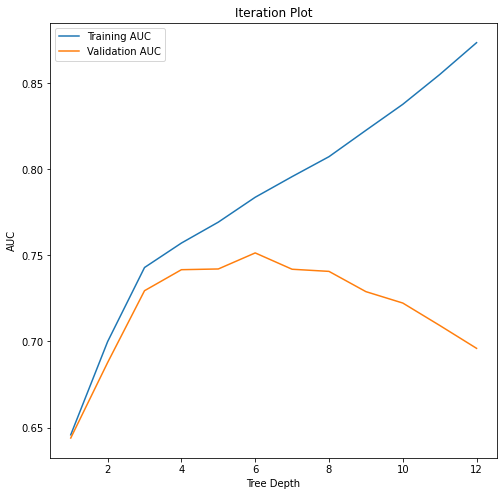

In [78]:
# plot tree depth vs.training and validation AUC
#using simple pandas plotting and matplotlib
candidate_results=pd.DataFrame.from_dict(candidate_models, orient='index')
fig,ax=plt.subplots(figsize=(8,8))
_=candidate_results[['Training AUC','Validation AUC']].plot(title='Iteration Plot',
                                                            ax=ax)
_=ax.set_xlabel('Tree Depth')
_=ax.set_ylabel('AUC')

In [79]:
# veiw same results as a table, using pandas iloc to remove first column of table
candidate_results.iloc[:, 1:]

Training AUC  Validation AUC  5-Fold 50
1       0.645748        0.643880   0.009275
2       0.699912        0.687752   0.012626
3       0.742968        0.729490   0.017401
4       0.757178        0.741696   0.016927
5       0.769331        0.742119   0.020375
6       0.783785        0.751446   0.018505
7       0.795777        0.741957   0.020786
8       0.807372        0.740718   0.014703
9       0.822665        0.728949   0.017601
10      0.837787        0.722324   0.010802
11      0.855081        0.709323   0.010071
12      0.873607        0.696002   0.011715

In [80]:
# plot the tree for human interpretation
best_model = candidate_models[4]['Model']
fig = plt.figure(figsize=(400, 70))
_ = tree.plot_tree(best_model,
                   feature_names=X_names,
                   class_names=['On time','Delinquent'],
                   filled=True)

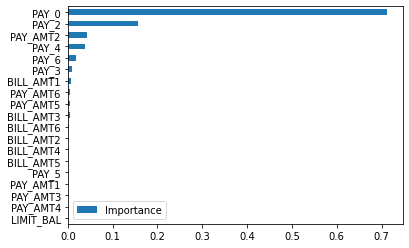

In [81]:
# plot variable importances

# create pandas dataframe
importances = pd.DataFrame(best_model.feature_importances_,
                          index=X_names,
                          columns=['Importance'])
# plot dataframe values
_ = importances.sort_values(by='Importance').plot(kind='barh')

In [82]:
# score on test data for 
# final HONEST assessment
# this is not to see how well the model *did*!
# it's to get an assessment of how it *will do* on unseen data!
test_phat = best_model.predict_proba(test_X)[:, 1] # get scores on test data
print('Test AUC: %.4f' % roc_auc_score(test_y, test_phat))

Test AUC: 0.7375


In [87]:
# function for confusion matrices
def get_confusion_matrix(frame, y, yhat, by=None, level=None, cutoff=0.5, verbose=True):
        """ (Creates confusion matrix from pandas dataframe of y and yhat values, can be sliced 
        by a variable and level.)

            :param frame: Pandas dataframe of actual (y) and predicted (yhat) values.
            :param y: Name of actual value column.
            :param yhat: Name of predicted value column.
            :param by: By variable to slice frame before creating confusion matrix, default None.
            :param level: Value of by variable to slice frame before creating confusion matrix, default None.
            :param cutoff: Cutoff threshold for confusion matrix, default 0.5.
            :param verbose: Whether to print confusion matrix titles, default True.
            :return: Confusion matrix as dataframe.
"""
#determine levels of target (y) varaiable
#sort for consistency 
level_list=list(frame[y],unique())
level_list.sort(reverse=True) 

#init confusion maritx
cm_frame=pd.DataFrame(columns=['actual:'+str(i) for i in level_list], Index=['predicted:'+str(i) for i in level_list])

#don't destory original data
frame_=frame.copy(deep=True)

#convert numeric predictions to binary decisions using cutoff
dname='d'+str(y)
frame_[dname]=np.where(frame_[yhat]>cutoff,1,0)

#slic frame
if (by is not None) & (level is not None):
  frame_=frame_[frame[by]==level]

# calcualte size of each confusion matrix value
for i, lev_i in enumerate(level_list):
  for j, lev_j in enumerate(level_list):
  cm_frame.iat[j,i] = frame_[frame_[y]==lev_i & (frame_[dname]==lev_j)].shape[0]
#little bug?

#output results
if verbose:
  if by is None:
    print ('Confusion matrix:')
  else:
      print ('Confusion matrix by'+by+'='+str(level))

      return cm_frame

IndentationError: ignored

In [ ]:
# funtion for AIR
def air(cm_dict,reference_key,protected_key, verbose=True);
"""Calculates the adverse impact ratio as a quotient between protected and reference group acceptance rates; protected_prop/reference_prop.
  Optionally prints intermediate values. Assumes 0 is positive outcome

  :param cm_dict: Dictionary of demographic group confusion matrices.
  :param reference_key: Name of reference group in cm_dict as a string.
  :param protected_key: Name of protected group in cm_dict as a string.
  :param verbose: Whether to print intermediate acceptance rates, default True.
  :return: AIR.
  
  """
  eps= 1e-20 # numeric stability and divde by 0 protection

  #reference group summary
  reference_accepted= float (cm_dict [reference_key].lat[1,0]+cm_dict[reference_key].lat[1,1])#predicted 0's
  reference_total= float (cm_dict[reference_key],sum(),sum())
  reference_prop= reference_accepted/reference_total
  if verbose;
    print(reference_key.title()+ 'proportion accepted: %.3f' % reference_prop )

#protected group summary
  protected_accepted= float (cm_dict [protected_key].lat[1,0]+cm_dict[protected_key].lat[1,1])#predicted 0's
  protected_total= float (cm_dict[protected_key],sum(),sum())
  protected_prop= protected_accepted/protected_total
  if verbose;
    print(protected_key.title()+ 'proportion accepted: %.3f' % protected_prop )


#return adverse impact ratio
return ((protected_prop+eps)/(reference_prop+eps))

In [ ]:
#add probabitlies onto validation set
#note we need a probability cutoff to make a final lending decision
valid_yhat=pd.DataFrame(valid_X,columns=X_names)
valid_yhat['RACE']=data.loc[valid_yhat.index,'RACE']
valid_yhat['SEX']=data.loc[valid_yhat.index,'SEX']
valid_yhat[y_name] = valid_y
valid_yhat['phat']=best_model.predict_proba(valid_X)[:,1]
valid_yhat.head()

In [ ]:
#calculate confusion matrices across race groups
#calculate confusion matrices at standard cutoff 0.15
#calcualte AIR
race_dict={'hispanic':1,'black':2,'white':3,'asian':4}
race_group_names=list(race_dict.keys())
race_cm_dict={}

#calculate cinfusion matrices at standard cutoff 0.15
for name in race_group_names;
    race_cm_dict[name]=get_confusion_matrix(valid_yhat,y_name,'phat',by='RACE',level=race_dict[name],cutoff=0.15)
    print(race_cm_dict[name])
    print('%s'%name.title())
    print()


#Calcualte AIR
for name in race_group_names;
  if name!='white';
  print('%s-to-%s AIR: %.2f'%(name,'white',air(race_cm_dict),'white',name))
  print()


In [ ]:
#calculate confusion matrices across sex groups
#calculate confusion matrices at standard cutoff 0.15
#calcualte AIR
sex_dict={'male':1,'female':2}
sex_group_names=list(sex_dict.keys())
sex_cm_dict={}

#calculate confusion matrices at standard cutoff 0.15
for name in sex_group_names;
    sex_cm_dict[name]=get_confusion_matrix(valid_yhat,y_name,'phat',by='SEX',level=sex_dict[name],cutoff=0.15)
    print(sex_cm_dict[name])
    print('%s'%name.title())
    print()


#Calcualte AIR
for name in sex_group_names;
  if name!='male';
  print('%s-to-%s AIR: %.2f'%(name,'male',air(sex_cm_dict),'male',name))
  print()

In [ ]:
# function to calculate accuracy at certain probaility cutoff

def get_acc(frame,cutoff,y_name,yhat_name);
""" Simpl wrapper for scikit-learn accuarcy_score to accept cutoffs.

param frame: Pandas DataFrame with y_name and yhat_name columns.
param cutoff:Numeric cutoff at which to calcualte accuarcy.
param y_name:Name of lable column in frame.
param yhat_name:Name of predicted probability column in frame.
return: accuaracy for frame,cutoff,y_name and yhat_name

"""

temp = frame.copy(deep=True)  #do not alter original data
temp['decision']=np.where(temply[y_name],temp)